# Task 2: Clustering

Import the libraries

In [ ]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
import sklearn.decomposition
from collections import defaultdict
from scipy.stats import pearsonr
import seaborn as sn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn import metrics
from sklearn.metrics.pairwise import euclidean_distances
import seaborn as sn
from itertools import combinations
from IPython.display import clear_output
!pip3 install pyclustering
from scipy.stats import mode
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
Profile=pd.read_csv('../Dataset/UserProfile.csv', skipinitialspace=True, sep=',',index_col=0)

In [ ]:
Profile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824 entries, 0 to 823
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             824 non-null    float64
 1   Imax                824 non-null    float64
 2   Iu                  824 non-null    float64
 3   I                   824 non-null    float64
 4   IAvg                824 non-null    float64
 5   meanAmount_BSKT     824 non-null    float64
 6   maxAmount_BSKT      824 non-null    float64
 7   minAmount_BSKT      824 non-null    float64
 8   unique_baskets      824 non-null    float64
 9   totalAmount         824 non-null    float64
 10  entropy_itemID      824 non-null    float64
 11  entropy_CategoryID  824 non-null    float64
 12  avg_month_spent     824 non-null    float64
 13  stdAmount_BSKT      824 non-null    float64
 14  stdMean_ratio       824 non-null    float64
 15  totalAmount_factor  824 non-null    float64
dtypes: float

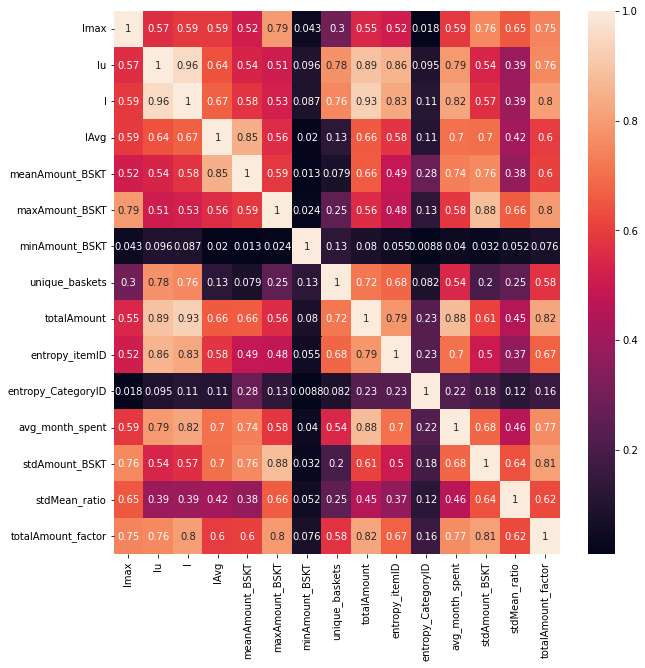

In [ ]:
corr_matrix = Profile.drop(columns=["user_id"]).corr()
plt.figure(figsize=(10,10))
sn.heatmap(abs(corr_matrix), annot=True)
plt.show()

We drop the highly correalted features, we use a threshold equal to 0.9, in this case we only remove the I attribute.

In [ ]:
ProfileCluster=Profile.drop(columns=['I'])

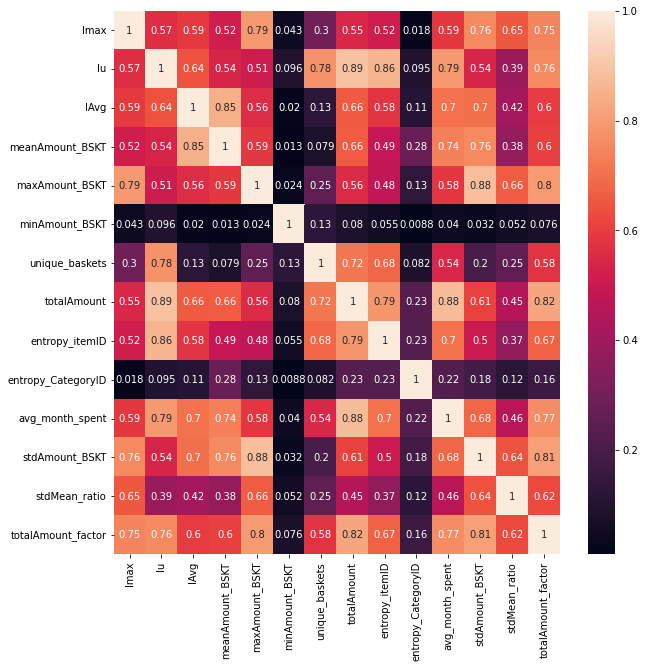

In [ ]:
corr_matrix = ProfileCluster.drop(columns=["user_id"]).corr()
plt.figure(figsize=(10,10))
sn.heatmap(abs(corr_matrix), annot=True)
plt.show()

In [ ]:
ProfileCluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824 entries, 0 to 823
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             824 non-null    float64
 1   Imax                824 non-null    float64
 2   Iu                  824 non-null    float64
 3   IAvg                824 non-null    float64
 4   meanAmount_BSKT     824 non-null    float64
 5   maxAmount_BSKT      824 non-null    float64
 6   minAmount_BSKT      824 non-null    float64
 7   unique_baskets      824 non-null    float64
 8   totalAmount         824 non-null    float64
 9   entropy_itemID      824 non-null    float64
 10  entropy_CategoryID  824 non-null    float64
 11  avg_month_spent     824 non-null    float64
 12  stdAmount_BSKT      824 non-null    float64
 13  stdMean_ratio       824 non-null    float64
 14  totalAmount_factor  824 non-null    float64
dtypes: float64(15)
memory usage: 103.0 KB


# K-Means


We choose a subset of three attributes that best describe user behavior during a shopping session

In [ ]:
ProfileCluster=Profile[['stdMean_ratio','maxAmount_BSKT','stdAmount_BSKT']]

In [ ]:
scaler = MinMaxScaler()
X= scaler.fit_transform(ProfileCluster.values)

In [ ]:
X[:5]

array([[0.43896546, 0.52420845, 0.51327325],
       [0.42826227, 0.52437943, 0.48160449],
       [0.37215627, 0.40421728, 0.35963119],
       [0.50973263, 0.78675311, 0.86238138],
       [0.44959389, 0.44493628, 0.67247281]])

### Elbow Method
We use the value of SSE and the value of the silhouette for select the best K

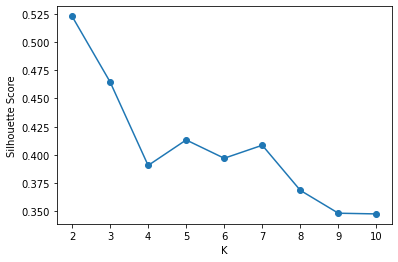

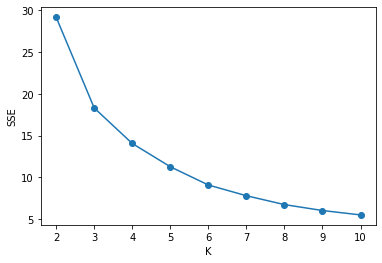

In [ ]:
max_k=10
sselist=list()
sillist=list()
for k in range(2,max_k+1):
    kmeans=KMeans(n_clusters=k,init="k-means++",n_init=100,max_iter=1000)
    kmeans.fit(X)
    sse=kmeans.inertia_
    sil=silhouette_score(X, kmeans.labels_)
    sselist.append(sse)
    sillist.append(sil)

plt.plot(range(2,len(sillist)+2),sillist, marker='o')
plt.ylabel('Silhouette Score')
plt.xlabel('K')
plt.show()


plt.plot(range(2,len(sselist)+2),sselist,marker='o')
plt.ylabel('SSE')
plt.xlabel('K')
plt.show()

In [ ]:
# Scegliamo 3 come valore per il clustering
k=3
kmeans=KMeans(n_clusters=k,init="k-means++",n_init=100,max_iter=1000)
kmeans.fit(X)
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))
print('Separation %s' % metrics.davies_bouldin_score(X, kmeans.labels_))

centers=scaler.inverse_transform(kmeans.cluster_centers_)

SSE 18.314418169230223
Silhouette 0.46470873815816127
Separation 0.777694286055739


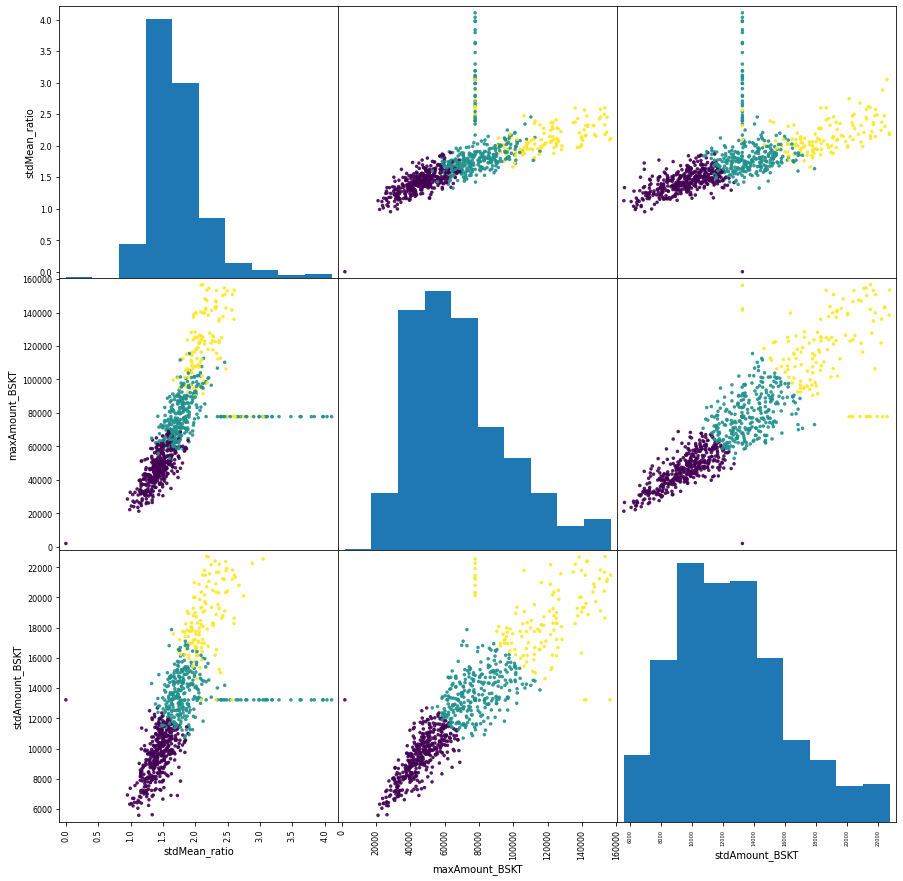

In [ ]:
pd.plotting.scatter_matrix(ProfileCluster, c=kmeans.labels_, s=50,alpha=0.9,figsize=(15, 15))
plt.tick_params(labelsize=5)
plt.show()

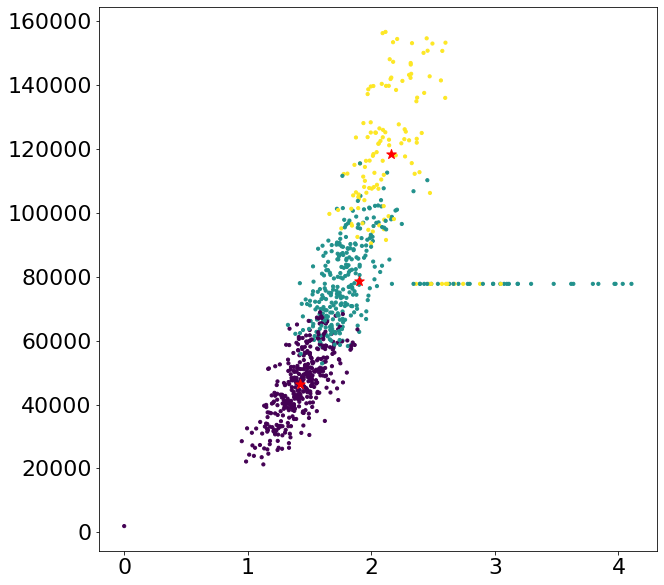

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(ProfileCluster['stdMean_ratio'], ProfileCluster['maxAmount_BSKT'], c=kmeans.labels_, 
            s=10)
plt.scatter(centers[:, 0], centers[:, 1], s=100, marker='*', c='r')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()


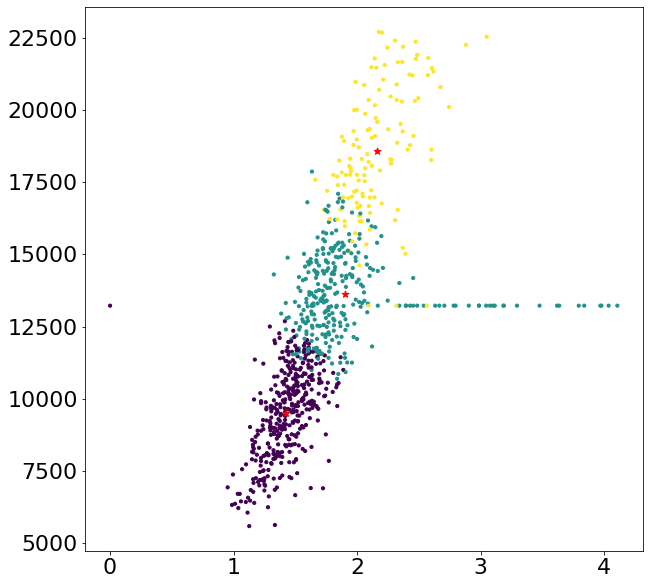

In [ ]:

plt.figure(figsize=(10,10))
plt.scatter(ProfileCluster['stdMean_ratio'], ProfileCluster['stdAmount_BSKT'], c=kmeans.labels_, 
            s=10)
plt.scatter(centers[:, 0], centers[:, 2], s=50, marker='*', c='r')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

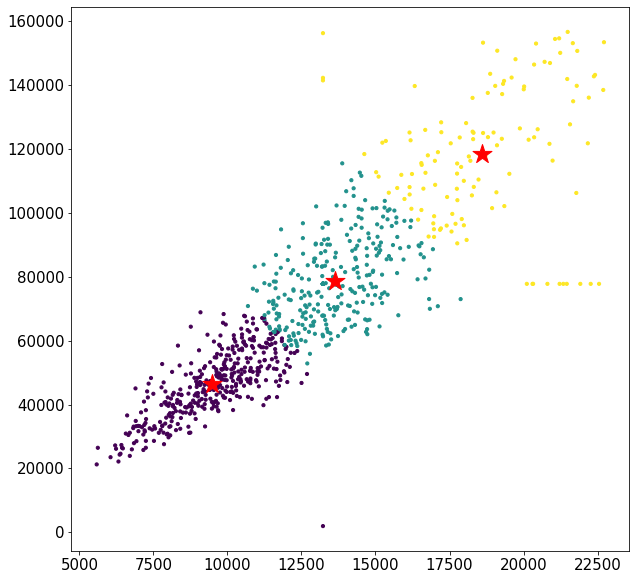

In [ ]:

plt.figure(figsize=(10,10))
plt.scatter(ProfileCluster['stdAmount_BSKT'], ProfileCluster['maxAmount_BSKT'], c=kmeans.labels_, 
            s=10)
plt.scatter(centers[:, 2], centers[:, 1], s=400, marker='*', c='red')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()


In [ ]:
def plot_similarity_heatmap(df, labels):
    df_plot = pd.DataFrame(df, copy=True)
    df_plot['cluster'] = labels
    columns = df_plot.columns[0:-1]
    df_plot.sort_values(by='cluster', ascending=True, inplace=True)
    dist = euclidean_distances(df_plot.loc[:, columns], df_plot.loc[:, columns])
    sim = np.exp(-dist)
    fig, ax = plt.subplots(figsize=(12,8))
    sn.heatmap(sim, ax=ax, cmap='coolwarm')


The coordinate plot and the radar plot show the differences for each attribute among the centroid of each cluster

<ipython-input-95-54dde138a8dd>:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(polar=True)


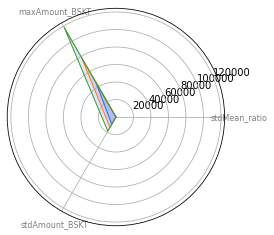

In [ ]:
# The coordinate plot and the radar plot show the differences for each attribute among the centroid of each cluster
from math import pi
 
# number of variable
N = len(ProfileCluster.columns)
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
for i in range(0, len(centers)):
    angles = [n / float(N) * 2 * pi for n in range(N)]
    values = centers[i].tolist()
    values += values[:1]
    angles += angles[:1]
# Initialise the spider plot
    ax = plt.subplot(polar=True)
# Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], ProfileCluster.columns, color='grey', size=8) 
# Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')
 # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)


Using Similarity Matrix for Cluster Validation: if we have well-separated clusters, then the similarity matrix should be roughly block-diagonal. 

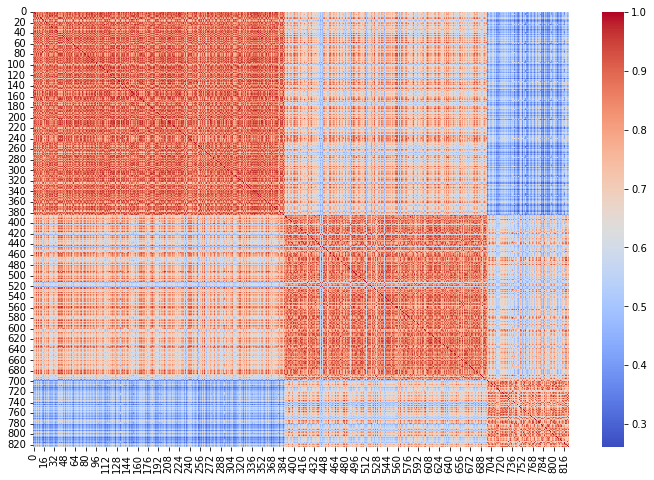

In [ ]:
# 
customers = kmeans.labels_
plot_similarity_heatmap(X, customers)

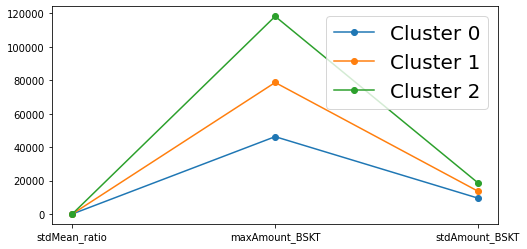

In [ ]:
plt.figure(figsize=(8, 4))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(range(0, len(ProfileCluster.columns)), ProfileCluster.columns, fontsize=10)
plt.legend(fontsize=20)
plt.show()

In [ ]:
centers

array([[1.42556070e+00, 4.62904978e+04, 9.49246920e+03],
       [1.90416578e+00, 7.87060972e+04, 1.36232005e+04],
       [2.15738832e+00, 1.18299415e+05, 1.85932681e+04]])

<ipython-input-99-0c0d2d00eb62>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ProfileCluster["cluster"] = kmeans.labels_


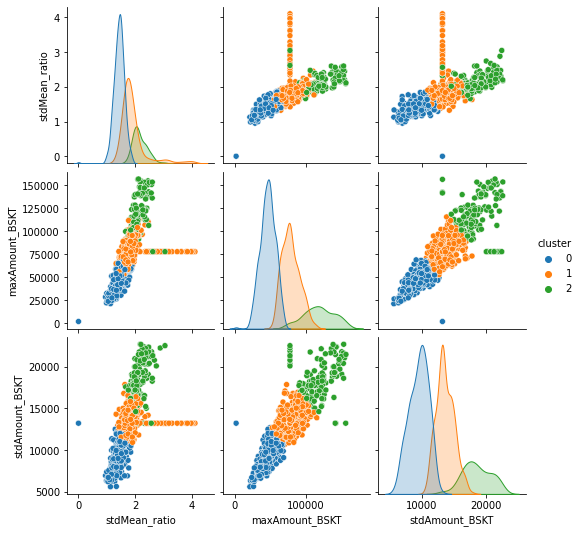

In [ ]:
ProfileCluster["cluster"] = kmeans.labels_
sn.pairplot(ProfileCluster, hue='cluster', palette='tab10')
plt.show()

# Hierarchical Clustering

In [ ]:
def count_cluster_elements(data, threshold, criterion='distance'):
    count = {}
    clusters = fcluster(data, threshold, criterion)
    for c in clusters:
        count[c] = count[c]+1 if c in count else 1
    return count, clusters

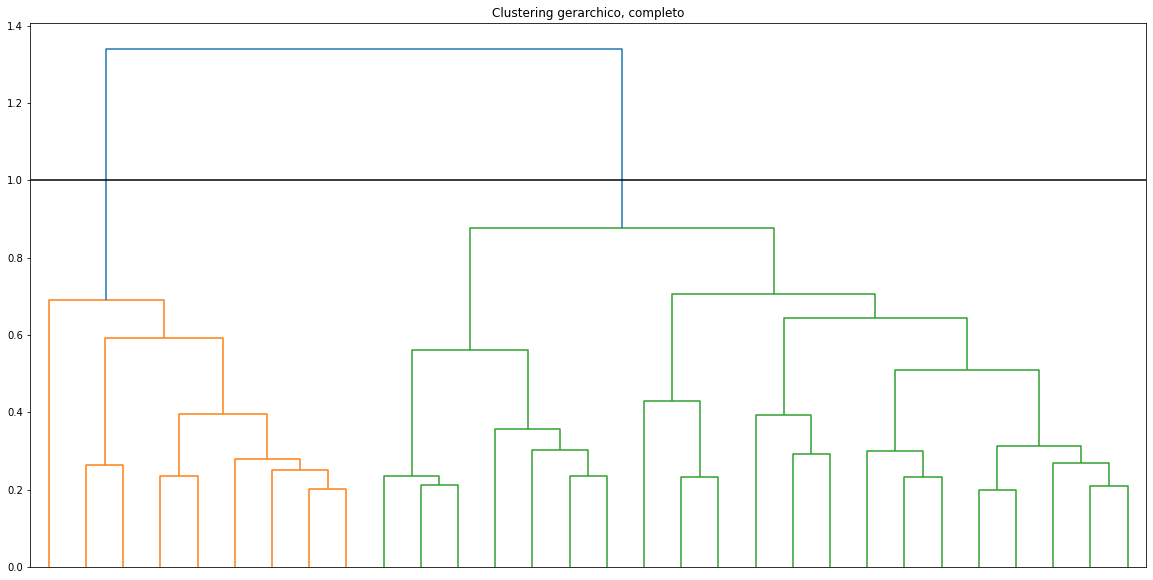

In [ ]:
plt.figure(figsize=(20,10))
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = dendrogram(data_link, color_threshold=1.0, truncate_mode='lastp')
plt.tick_params(labelbottom=False)

plt.title("Clustering gerarchico, completo")

plt.axhline(y=1.0, color="black")

plt.show()


In [ ]:

count, clusters = count_cluster_elements(data_link, 1.0)
score = silhouette_score(X, clusters)
print("Clusters:", len(count.keys()), end=" - ")
print(list(reversed(sorted(count.values()))))
print(f"Silhouette score: {score}")

Clusters: 2 - [462, 362]
Silhouette score: 0.506934062766214


<Figure size 1440x720 with 0 Axes>

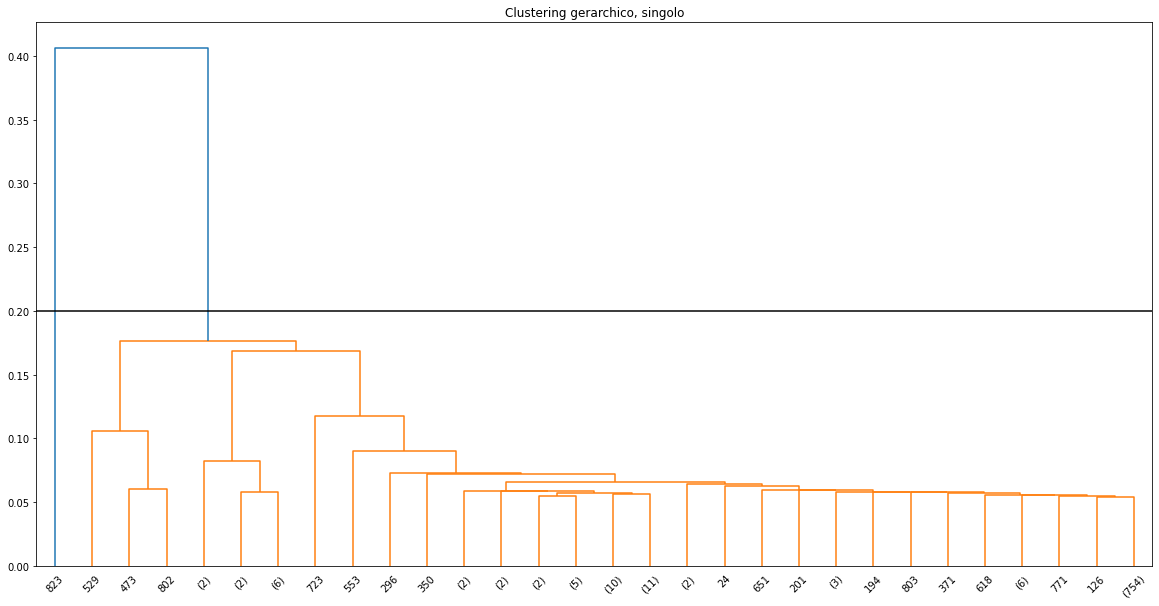

In [ ]:
plt.figure(figsize=(20,10))
data_dist = pdist(X, metric='euclidean')
plt.figure(figsize=(20,10))
data_link = linkage(data_dist, method='single', metric='euclidean')
plt.title("Clustering gerarchico, singolo")
plt.axhline(y=0.20, color="black")
res = dendrogram(data_link, color_threshold=0.20, truncate_mode='lastp')

In [ ]:

count, clusters = count_cluster_elements(data_link, 0.20)
score = silhouette_score(X, clusters)
print("Clusters:", len(count.keys()), end=" - ")
print(list(reversed(sorted(count.values()))))
print(f"Silhouette score: {score}")

Clusters: 2 - [823, 1]
Silhouette score: 0.45093526458554795


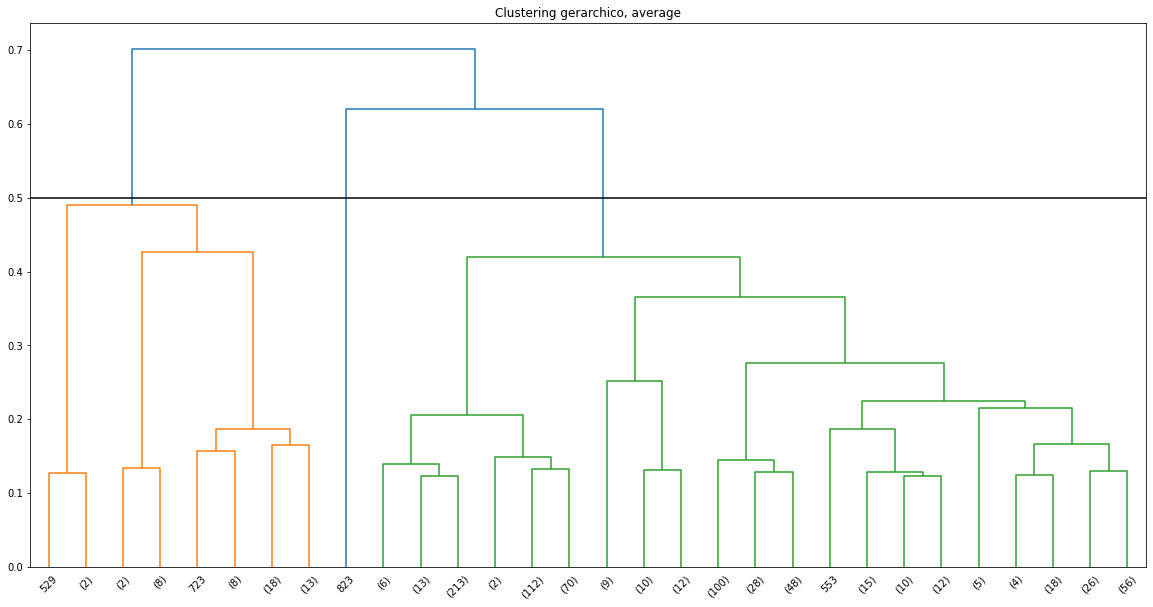

In [ ]:
data_dist = pdist(X, metric='euclidean')
plt.figure(figsize=(20,10))
data_link = linkage(data_dist, method='average', metric='euclidean')
plt.title("Clustering gerarchico, average")
res = dendrogram(data_link, color_threshold=0.5, truncate_mode='lastp')
plt.axhline(y=0.5, color="black")

In [ ]:

count, clusters = count_cluster_elements(data_link, 0.5)
score = silhouette_score(X, clusters)
print("Clusters:", len(count.keys()), end=" - ")
print(list(reversed(sorted(count.values()))))
print(f"Silhouette score: {score}")

Clusters: 3 - [770, 53, 1]
Silhouette score: 0.3937568465876774


# DB-SCAN

In [ ]:
ProfileCluster2=Profile.drop(columns=['user_id','minAmount_BSKT'])
scaler = MinMaxScaler()
X= scaler.fit_transform(ProfileCluster2.values)

## Using all the attributes

In [ ]:
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import pdist, squareform

[0.62887341 0.96080209 0.83501233 ... 0.28517436 0.76550511 0.71312442]

[[0.         0.62887341 0.96080209 ... 0.6597908  0.61275763 1.11247738]
 [0.62887341 0.         1.37029076 ... 0.92813593 0.82611068 1.27409197]
 [0.96080209 1.37029076 0.         ... 0.74106834 0.67914727 0.99810281]
 ...
 [0.6597908  0.92813593 0.74106834 ... 0.         0.28517436 0.76550511]
 [0.61275763 0.82611068 0.67914727 ... 0.28517436 0.         0.71312442]
 [1.11247738 1.27409197 0.99810281 ... 0.76550511 0.71312442 0.        ]]


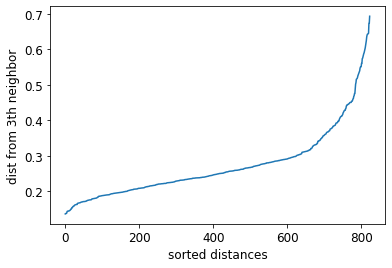

In [ ]:
dist = pdist(X, 'euclidean') #pair wise distance
print (dist)
dist = squareform(dist) #distance matrix given the vector dist
print()
print(dist)

k = 3
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=12)
plt.xlabel('sorted distances', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.show()

Zoom inside curve

[0.62887341 0.96080209 0.83501233 ... 0.28517436 0.76550511 0.71312442]

[[0.         0.62887341 0.96080209 ... 0.6597908  0.61275763 1.11247738]
 [0.62887341 0.         1.37029076 ... 0.92813593 0.82611068 1.27409197]
 [0.96080209 1.37029076 0.         ... 0.74106834 0.67914727 0.99810281]
 ...
 [0.6597908  0.92813593 0.74106834 ... 0.         0.28517436 0.76550511]
 [0.61275763 0.82611068 0.67914727 ... 0.28517436 0.         0.71312442]
 [1.11247738 1.27409197 0.99810281 ... 0.76550511 0.71312442 0.        ]]


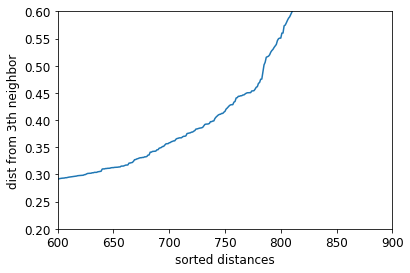

In [ ]:
dist = pdist(X, 'euclidean') #pair wise distance
print (dist)
dist = squareform(dist) #distance matrix given the vector dist
print()
print(dist)

k = 3
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=12)
plt.xlabel('sorted distances', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.xlim(600, 900)
plt.ylim(0.2,0.6)
plt.show()

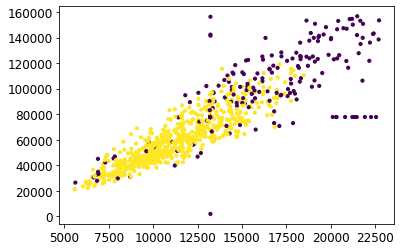

(array([-1,  0]), array([210, 614]))

In [ ]:
dbscan = DBSCAN(eps=0.33, min_samples=20)
dbscan.fit(X)

plt.scatter(Profile['stdAmount_BSKT'], Profile['maxAmount_BSKT'], c=dbscan.labels_, s=10)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

#cluster size
np.unique(dbscan.labels_, return_counts=True)

In [ ]:
print('Silhouette %s' % silhouette_score(X, dbscan.labels_))

Silhouette 0.2495668115162292


## We try different attributes

### Combination 1

In [ ]:
ProfileDB=Profile[['stdMean_ratio','maxAmount_BSKT','stdAmount_BSKT']]
scaler = MinMaxScaler()
X= scaler.fit_transform(ProfileDB.values)

[0.033429   0.20607579 0.44250896 ... 0.06898789 0.51636903 0.50445228]

[[0.         0.033429   0.20607579 ... 0.3987651  0.33983112 0.68702466]
 [0.033429   0.         0.18017856 ... 0.37170906 0.31272509 0.67797184]
 [0.20607579 0.18017856 0.         ... 0.19438495 0.13414831 0.55620294]
 ...
 [0.3987651  0.37170906 0.19438495 ... 0.         0.06898789 0.51636903]
 [0.33983112 0.31272509 0.13414831 ... 0.06898789 0.         0.50445228]
 [0.68702466 0.67797184 0.55620294 ... 0.51636903 0.50445228 0.        ]]


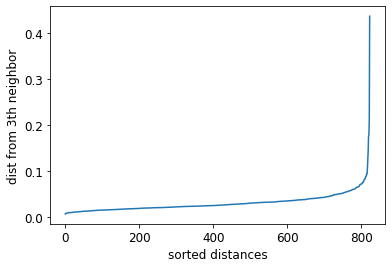

In [ ]:
dist = pdist(X, 'euclidean') #pair wise distance
print (dist)
dist = squareform(dist) #distance matrix given the vector dist
print()
print(dist)

k = 3
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=12)
plt.xlabel('sorted distances', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.show()

[0.033429   0.20607579 0.44250896 ... 0.06898789 0.51636903 0.50445228]

[[0.         0.033429   0.20607579 ... 0.3987651  0.33983112 0.68702466]
 [0.033429   0.         0.18017856 ... 0.37170906 0.31272509 0.67797184]
 [0.20607579 0.18017856 0.         ... 0.19438495 0.13414831 0.55620294]
 ...
 [0.3987651  0.37170906 0.19438495 ... 0.         0.06898789 0.51636903]
 [0.33983112 0.31272509 0.13414831 ... 0.06898789 0.         0.50445228]
 [0.68702466 0.67797184 0.55620294 ... 0.51636903 0.50445228 0.        ]]


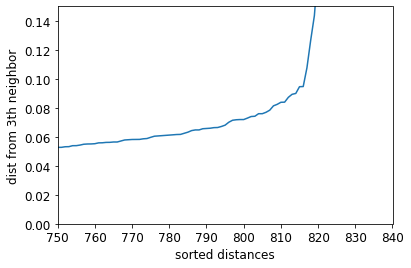

In [ ]:
dist = pdist(X, 'euclidean') #pair wise distance
print (dist)
dist = squareform(dist) #distance matrix given the vector dist
print()
print(dist)

k = 3
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=12)
plt.xlabel('sorted distances', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.xlim(750, 840)
plt.ylim(0,0.15)
plt.show()

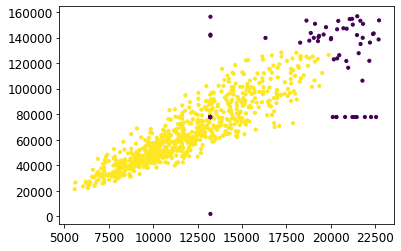

(array([-1,  0]), array([ 78, 746]))

In [ ]:
dbscan = DBSCAN(eps=0.0959, min_samples=20)
dbscan.fit(X)

plt.scatter(Profile['stdAmount_BSKT'], Profile['maxAmount_BSKT'], c=dbscan.labels_, s=10)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

#cluster size
np.unique(dbscan.labels_, return_counts=True)

In [ ]:
print('Silhouette %s' % silhouette_score(X, dbscan.labels_))

Silhouette 0.4700102720487647


In [ ]:
dbscan.labels_[:20]

array([ 0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,
        0,  0,  0])

In [ ]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0]), array([ 78, 746]))

### Combination 2

In [ ]:
ProfileDB=Profile[['entropy_itemID','stdAmount_BSKT','I']]
scaler = MinMaxScaler()
X= scaler.fit_transform(ProfileDB.values)

[0.23202373 0.53390652 0.43912181 ... 0.05815794 0.24973281 0.19526028]

[[0.         0.23202373 0.53390652 ... 0.32293787 0.27224202 0.08517176]
 [0.23202373 0.         0.74379885 ... 0.40952738 0.38483822 0.28433673]
 [0.53390652 0.74379885 0.         ... 0.49103091 0.45962769 0.47071183]
 ...
 [0.32293787 0.40952738 0.49103091 ... 0.         0.05815794 0.24973281]
 [0.27224202 0.38483822 0.45962769 ... 0.05815794 0.         0.19526028]
 [0.08517176 0.28433673 0.47071183 ... 0.24973281 0.19526028 0.        ]]


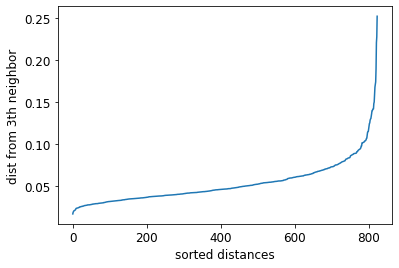

In [ ]:
dist = pdist(X, 'euclidean') #pair wise distance
print (dist)
dist = squareform(dist) #distance matrix given the vector dist
print()
print(dist)

k = 3
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=12)
plt.xlabel('sorted distances', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

This gives lower Silhouette value

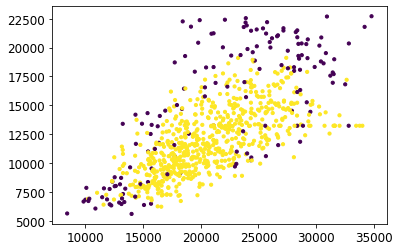

Silhouette 0.30232757548477507


In [ ]:
dbscan = DBSCAN(eps=0.095, min_samples=20)
dbscan.fit(X)

plt.scatter(Profile['avg_month_spent'], Profile['stdAmount_BSKT'], c=dbscan.labels_, s=10)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

#cluster size
np.unique(dbscan.labels_, return_counts=True)

print('Silhouette %s' % silhouette_score(X, dbscan.labels_))

**Considerations on DBSCAN**

DBSCAN seems to find one big cluster and many noise points. The combination of attributes used for K-Means, which was associated with max Silhouette value, seems to be a good choice also for DBSCAN. The best Silhouette value obtained is 0.469

In [ ]:
scaler = MinMaxScaler()
X= scaler.fit_transform(Profile.drop(columns=['user_id','minAmount_BSKT']).values)

[3.1181698  4.30398359 2.68079357 ... 3.07573875 9.86170987 9.72877352]

[[ 0.          3.1181698   4.30398359 ...  2.25478272  3.35057708
   9.95517939]
 [ 3.1181698   0.          4.06605261 ...  3.28681922  2.58615661
  10.0009725 ]
 [ 4.30398359  4.06605261  0.         ...  4.79578747  2.98896292
  10.31735006]
 ...
 [ 2.25478272  3.28681922  4.79578747 ...  0.          3.07573875
   9.86170987]
 [ 3.35057708  2.58615661  2.98896292 ...  3.07573875  0.
   9.72877352]
 [ 9.95517939 10.0009725  10.31735006 ...  9.86170987  9.72877352
   0.        ]]


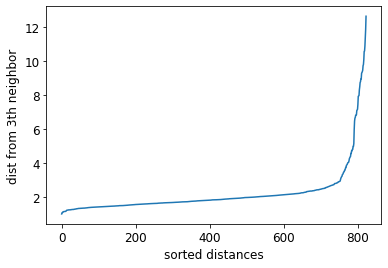

In [ ]:
dist = pdist(X, 'mahalanobis') #pair wise distance
print (dist)
dist = squareform(dist) #distance matrix given the vector dist
print()
print(dist)

k = 3
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=12)
plt.xlabel('sorted distances', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.show()


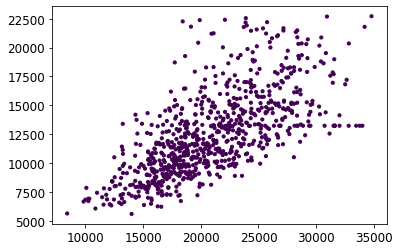

(array([0]), array([824]))

In [ ]:
dbscan = DBSCAN(eps=2.5, min_samples=20)
dbscan.fit(X)

plt.scatter(Profile['avg_month_spent'], Profile['stdAmount_BSKT'], c=dbscan.labels_, s=10)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

#cluster size
np.unique(dbscan.labels_, return_counts=True)

#print('Silhouette %s' % silhouette_score(X, dbscan.labels_))

In [ ]:
ProfileDB=Profile[['totalAmount_factor','stdMean_ratio','I']]
scaler = MinMaxScaler()
X= scaler.fit_transform(ProfileDB.values)

[1.37657554 2.07089663 1.44478037 ... 0.69962257 4.01563574 4.25410945]

[[0.         1.37657554 2.07089663 ... 1.15852401 1.09552072 5.08410362]
 [1.37657554 0.         3.07298173 ... 1.99238714 1.72586741 5.11530867]
 [2.07089663 3.07298173 0.         ... 2.33621949 1.99047968 5.88308246]
 ...
 [1.15852401 1.99238714 2.33621949 ... 0.         0.69962257 4.01563574]
 [1.09552072 1.72586741 1.99047968 ... 0.69962257 0.         4.25410945]
 [5.08410362 5.11530867 5.88308246 ... 4.01563574 4.25410945 0.        ]]


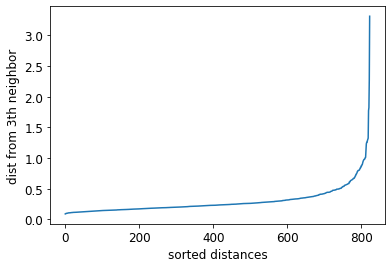

In [ ]:
dist = pdist(X, 'mahalanobis') #pair wise distance
print (dist)
dist = squareform(dist) #distance matrix given the vector dist
print()
print(dist)

k = 3
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=12)
plt.xlabel('sorted distances', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.show()


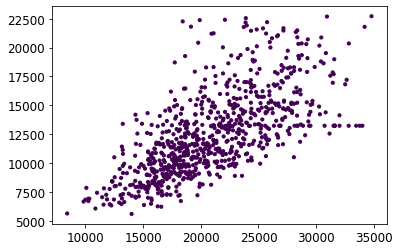

(array([0]), array([824]))

In [ ]:
dbscan = DBSCAN(eps=0.6, min_samples=20)
dbscan.fit(X)

plt.scatter(Profile['avg_month_spent'], Profile['stdAmount_BSKT'], c=dbscan.labels_, s=10)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

#cluster size
np.unique(dbscan.labels_, return_counts=True)

#print('Silhouette %s' % silhouette_score(X, dbscan.labels_))

# Extra clustering with pyclustering

In [ ]:
from pyclustering.cluster import cluster_visualizer;
from pyclustering.cluster.cure import cure;
from pyclustering.utils import read_sample;
from pyclustering.samples.definitions import FCPS_SAMPLES;
from pyclustering.cluster.silhouette import silhouette

In [ ]:
X

array([[0.50017472, 0.43896546, 0.55603448],
       [0.66761363, 0.42826227, 0.75107759],
       [0.32293868, 0.37215627, 0.22413793],
       ...,
       [0.33798584, 0.33988136, 0.48275862],
       [0.37948082, 0.32297444, 0.47306034],
       [0.        , 0.        , 0.51026453]])

CURE Algorithm 

Function to choose best K

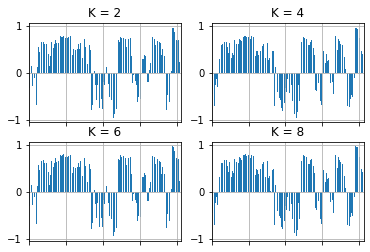

In [ ]:

import matplotlib.pyplot as plt
def get_score(sample, amount_clusters):
    # Prepare initial centers for K-Means algorithm.
    # Perform cluster analysis.
    cure_instance = cure(X, 6);
    cure_instance.process();
    clusters = cure_instance.get_clusters();
    # Calculate Silhouette score.
    return silhouette(sample, clusters).process().get_score()
def draw_score(figure, position, title, score):
    ax = figure.add_subplot(position)
    ax.bar(range(0, len(score)), score, width=0.7)
    ax.set_title(title)
    ax.set_xlim(0, len(score))
    ax.set_xticklabels([])
    ax.grid()

# Perform cluster analysis and estimation by Silhouette.
score_2 = get_score(X, 2)  # K = 2 
score_4 = get_score(X, 4)  # K = 4 
score_6 = get_score(X, 6)  # K = 6
score_8 = get_score(X, 8)  # K = 8
# Visualize results.
figure = plt.figure()
# Visualize each result separately.
draw_score(figure, 221, 'K = 2', score_2)
draw_score(figure, 222, 'K = 4', score_4)
draw_score(figure, 223, 'K = 6', score_6)
draw_score(figure, 224, 'K = 8', score_8)


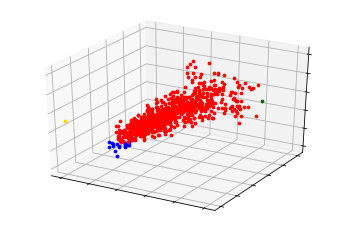

In [ ]:
from pyclustering.cluster import cluster_visualizer;
from pyclustering.cluster.cure import cure;
from pyclustering.utils import read_sample;
from pyclustering.samples.definitions import FCPS_SAMPLES;


# Allocate three clusters.
cure_instance = cure(X, 4);
cure_instance.process();
clusters = cure_instance.get_clusters();

# Visualize allocated clusters.
visualizer = cluster_visualizer();
visualizer.append_clusters(clusters, X);
visualizer.show();

MBSAS Algorithm

In [ ]:
from pyclustering.cluster.bsas import bsas_visualizer;
from pyclustering.cluster.mbsas import mbsas;

from pyclustering.samples.definitions import SIMPLE_SAMPLES, FCPS_SAMPLES;

from pyclustering.utils import read_sample;
from pyclustering.utils.metric import distance_metric, type_metric;


def template_clustering(sample, amount, threshold, **kwargs):
    metric = kwargs.get('metric', distance_metric(type_metric.EUCLIDEAN_SQUARE));
    ccore = kwargs.get('ccore', False);
    draw = kwargs.get('draw', True);

    mbsas_instance = mbsas(sample, amount, threshold, ccore=ccore, metric=metric);
    mbsas_instance.process();

    clusters = mbsas_instance.get_clusters();
    representatives = mbsas_instance.get_representatives();

    if draw is True:
        bsas_visualizer.show_clusters(sample, clusters, representatives);

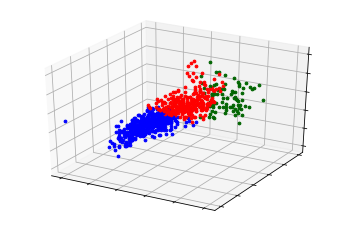

In [ ]:
template_clustering(X, 3, 0.18)